# Transfer learning fine tunning

- we have done transfer learning feature extraction
- here we will fine tunning.

In [1]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-11 09:25:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-11 09:25:16 (19.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [1]:
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves, create_tensorboard_callback, pred_and_plot

## let get data

- we are using tf.keras.applications and apply to our problem

https://www.tensorflow.org/api_docs/python/tf/keras/applications


In [3]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [4]:
walk_through_dir("data/10_food_classes_10_percent")

There are 2 directories and 0 images in 'data/10_food_classes_10_percent'.
There are 10 directories and 0 images in 'data/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in 'data/10_food_classes_10_percent/test/ramen'.
There are 0 directo

In [2]:
import tensorflow as tf

train_dir = "data/10_food_classes_10_percent/train"
test_dir = "data/10_food_classes_10_percent/test"

In [9]:
IMAGE_SHAPE = (224,224)
BATCH=32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir, image_size=IMAGE_SHAPE, batch_size=BATCH, 
                                                                            label_mode="categorical")


test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir, image_size=IMAGE_SHAPE, batch_size=BATCH, 
                                                                            label_mode="categorical")

Found 750 files belonging to 10 classes.
Metal device set to: Apple M1 Pro


2023-03-11 09:36:00.937341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-11 09:36:00.938039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [15]:
for images, labels in train_data_10_percent.take(1):
    print(len(labels), images)

32 tf.Tensor(
[[[[6.38214264e+01 6.81224518e+01 5.73367348e+01]
   [6.80051041e+01 6.90765305e+01 6.41275482e+01]
   [6.32857170e+01 6.26428566e+01 5.31530609e+01]
   ...
   [1.29296051e+02 1.23383026e+02 1.17816826e+02]
   [1.16877579e+02 1.30091904e+02 1.19877579e+02]
   [1.20724365e+02 1.32754883e+02 1.25183632e+02]]

  [[4.83061256e+01 5.13316307e+01 4.72091827e+01]
   [7.03010178e+01 7.03724442e+01 6.88010178e+01]
   [6.94693909e+01 6.88265305e+01 5.74693909e+01]
   ...
   [1.27617340e+02 1.28831757e+02 1.23005310e+02]
   [1.18270416e+02 1.33989777e+02 1.20566261e+02]
   [1.21908272e+02 1.32025436e+02 1.21719498e+02]]

  [[1.55204105e+01 1.68265343e+01 1.85357170e+01]
   [6.80306168e+01 6.81020432e+01 6.99030685e+01]
   [6.87091827e+01 6.80663300e+01 5.67091827e+01]
   ...
   [1.22306091e+02 1.30693909e+02 1.25097031e+02]
   [1.21642830e+02 1.35459122e+02 1.18841766e+02]
   [1.19729683e+02 1.27071396e+02 1.15066566e+02]]

  ...

  [[2.26000031e+02 2.33413330e+02 2.30642853e+02]
  

In [73]:
#  Model 0 using keras functional api

base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, # top is output layer we want to change it to 10 classes
    )
base_model.trainable = False

inputs =  tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# resnet50v2 needs rescaling, not for efficientnet as they have rescaling builtin 
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/.255)(inputs)

x = base_model(inputs)
x.shape


#  average pooling our outputs from base model to get most important models.
x = tf.keras.layers.GlobalAveragePooling2D(name="gloable_average_pooling2d")(x)
x.shape

# output activation layers
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='CategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_0.fit(train_data_10_percent, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data_10_percent, 
                       validation_steps=len(test_data_10_percent), callbacks=[create_tensorboard_callback(dir_name="tensorboard_hub_05", experiment_name="05_model_0")])

Saving TensorBoard log files to: tensorboard_hub_05/05_model_0/20230312-073534
Epoch 1/5


2023-03-12 07:35:37.367944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 1.9716 - accuracy: 0.3507

2023-03-12 07:35:52.964881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 33s 947ms/step - loss: 1.9716 - accuracy: 0.3507 - val_loss: 1.3550 - val_accuracy: 0.7360
Epoch 2/5
24/24 [==============================] - 11s 488ms/step - loss: 1.1540 - accuracy: 0.7493 - val_loss: 0.8964 - val_accuracy: 0.8204
Epoch 3/5
24/24 [==============================] - 11s 450ms/step - loss: 0.8198 - accuracy: 0.8320 - val_loss: 0.7081 - val_accuracy: 0.8468
Epoch 4/5
24/24 [==============================] - 11s 467ms/step - loss: 0.6715 - accuracy: 0.8507 - val_loss: 0.6185 - val_accuracy: 0.8584
Epoch 5/5
24/24 [==============================] - 11s 483ms/step - loss: 0.5673 - accuracy: 0.8880 - val_loss: 0.5616 - val_accuracy: 0.8628


In [25]:
!tensorboard dev upload --logdir ./tensorboard_hub_05 --name "05"    --description "tt fine tuning" --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/JRqBdwA6SYWYJVhEnql9pQ/

[2023-03-12T12:38:39] Started scanning logdir.
[2023-03-12T12:39:11] Total uploaded: 204 scalars, 0 tensors, 10 binary objects (11.9 MB)
[2023-03-12T12:39:11] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/JRqBdwA6SYWYJVhEnql9pQ/


In [20]:
# check layers

for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_2
1 rescaling_2
2 normalization_1
3 rescaling_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [21]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

In [22]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 gloable_average_pooling2d (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


# Getting feature vector from our training model

- our model has global average pool which converts 4d(efficientnetb0 output) to 2d tensor(None, 1280)

- lets that to convert (1,4,4,3) using global average pooling2d

In [24]:

input_shape = (1,4,4, 3)


# random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
input_tensor


<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[ 0.3274686 , -0.8426257 ,  0.3194336 ],
         [-1.4075519 , -2.3880599 , -1.0392479 ],
         [-0.5573232 ,  0.5397071 ,  1.6994324 ],
         [ 0.28893656, -1.5066117 , -0.26454768]],

        [[-0.5972242 , -1.9171131 , -0.6204413 ],
         [ 0.8504024 , -0.4060477 , -3.0258412 ],
         [ 0.9058465 ,  0.29855984, -0.22561562],
         [-0.7616443 , -1.891714  , -0.9384712 ]],

        [[ 0.77852213, -0.47338897,  0.97772706],
         [ 0.24694408,  0.20573746, -0.5256234 ],
         [ 0.32410023,  0.02545409, -0.10638493],
         [-0.6369476 ,  1.1603122 ,  0.25073594]],

        [[-0.41728497,  0.40125772, -1.4145442 ],
         [-0.5931858 , -1.6617215 ,  0.3356716 ],
         [ 0.1081563 ,  0.23479682, -0.56668764],
         [-0.35819843,  0.8869861 ,  0.5274477 ]]]], dtype=float32)>

In [26]:
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

global_average_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368647, -0.45840445, -0.28855982]], dtype=float32)>

In [28]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368647, -0.45840445, -0.28855982]], dtype=float32)>

# series of model expirements

lets see how it works with 1% of data
evaluation data is same for all 

- 'model_1' -  feature extraction 1% data, with data augmentation
- 'model_2' - feature extraction  10% data, with data augmentation
- 'model_3' - fine tunning 10% data, with data augmentation
- 'model_4' - fine tunning 100% data, with data augmentation

In [30]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-03-11 11:06:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

0_food_classes_1_pe   7%[>                   ]   9.87M   442KB/s    eta 4m 45s ^C


In [31]:
walk_through_dir("data/10_food_classes_1_percent")

There are 2 directories and 0 images in 'data/10_food_classes_1_percent'.
There are 10 directories and 0 images in 'data/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in 'data/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 25

In [4]:
import tensorflow as tf

train_dir_1per = "data/10_food_classes_1_percent/train"
test_dir = "data/10_food_classes_1_percent/test"

In [36]:
IMAGE_SHAPE = (224,224)
BATCH=32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1per, image_size=IMAGE_SHAPE, batch_size=BATCH, 
                                                                            label_mode="categorical")


test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_1per, image_size=IMAGE_SHAPE, batch_size=BATCH, 
                                                                            label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [69]:
from tensorflow.keras.layers.experimental import preprocessing

data_agumentation =  tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)

], name="data_agumentation")

In [78]:
#  Model 1 using keras functional api

base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, # top is output layer we want to change it to 10 classes
    )
base_model.trainable = False

inputs =  tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# resnet50v2 needs rescaling, not for efficientnet as they have rescaling builtin 
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/.255)(inputs)

x = data_agumentation(inputs)
print(x.shape)

x = base_model(x, training=False)
print(x.shape)



#  average pooling our outputs from base model to get most important models.
x = tf.keras.layers.GlobalAveragePooling2D(name="gloable_average_pooling2d")(x)
x.shape

# output activation layers
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='CategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_model_1 = model_1.fit(train_data_1_percent, epochs=5, steps_per_epoch=len(train_data_1_percent), validation_data=test_data, 
                       validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name="tensorboard_hub_05", experiment_name="05_model_1")])

(None, 224, 224, 3)
(None, 7, 7, 1280)
Saving TensorBoard log files to: tensorboard_hub_05/05_model_1/20230312-074644
Epoch 1/5


2023-03-12 07:46:51.382579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 2.3477 - accuracy: 0.1429

2023-03-12 07:47:11.414119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 61s 23s/step - loss: 2.3477 - accuracy: 0.1429 - val_loss: 2.2106 - val_accuracy: 0.1836
Epoch 2/5
3/3 [==============================] - 45s 19s/step - loss: 2.1004 - accuracy: 0.3000 - val_loss: 2.0828 - val_accuracy: 0.2536
Epoch 3/5
3/3 [==============================] - 43s 19s/step - loss: 1.8562 - accuracy: 0.4000 - val_loss: 1.9713 - val_accuracy: 0.3360
Epoch 4/5
3/3 [==============================] - 46s 20s/step - loss: 1.6912 - accuracy: 0.5143 - val_loss: 1.8721 - val_accuracy: 0.4116
Epoch 5/5
3/3 [==============================] - 47s 21s/step - loss: 1.6212 - accuracy: 0.5429 - val_loss: 1.7848 - val_accuracy: 0.4712


## advanatages of adding data augmentation in the model

If data augmentation is added as a layers 
- it is picked up by GPU for processing
- data is augmentation is done in the model only, so we can easily export it. 


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1per + "/"+ target_class
random_image = random.choice(os.listdir(target_dir))
random_path = target_dir + "/" + random_image
image = img.imread(random_path)
plt.imshow(image)
plt.title(f"original image {target_class}")
plt.axis(False)

aug_image = data_agumentation(tf.expand_dims(image, axis=0), training=True)
plt.figure()
plt.imshow(tf.squeeze(aug_image)/255)
plt.title(f"augmented image {target_class}")
plt.axis(False)

NameError: name 'train_data_1_percent' is not defined

In [71]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_agumentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 gloable_average_pooling2d (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

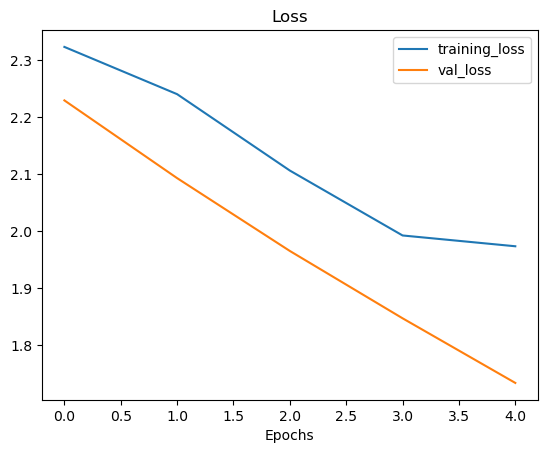

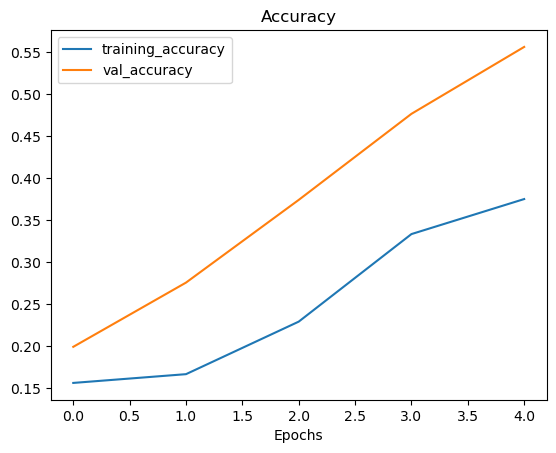

In [75]:
plot_loss_curves(history_model_1)

In [82]:
#  Model 2 using keras functional api

base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, # top is output layer we want to change it to 10 classes
    )
base_model.trainable = False

inputs =  tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# resnet50v2 needs rescaling, not for efficientnet as they have rescaling builtin 
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/.255)(inputs)

x = data_agumentation(inputs)
print(x.shape)

x = base_model(x, training=False)
print(x.shape)



#  average pooling our outputs from base model to get most important models.
x = tf.keras.layers.GlobalAveragePooling2D(name="gloable_average_pooling2d")(x)
x.shape

# output activation layers
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='CategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_model_2 = model_2.fit(train_data_10_percent, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, 
                       validation_steps=(0.25 * len(test_data)), callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="tensorboard_hub_05", experiment_name="05_model_2")])

(None, 224, 224, 3)
(None, 7, 7, 1280)
Saving TensorBoard log files to: tensorboard_hub_05/05_model_2/20230312-075836
Epoch 1/5


2023-03-12 07:58:40.085651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 1.9794 - accuracy: 0.3440

2023-03-12 08:01:13.973838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: saving model to tensor_checkpoint
24/24 [==============================] - 176s 7s/step - loss: 1.9794 - accuracy: 0.3440 - val_loss: 1.4050 - val_accuracy: 0.7031
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2828 - accuracy: 0.7053
Epoch 2: saving model to tensor_checkpoint
24/24 [==============================] - 83s 3s/step - loss: 1.2828 - accuracy: 0.7053 - val_loss: 0.9502 - val_accuracy: 0.8016
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9877 - accuracy: 0.7613
Epoch 3: saving model to tensor_checkpoint
24/24 [==============================] - 88s 4s/step - loss: 0.9877 - accuracy: 0.7613 - val_loss: 0.7470 - val_accuracy: 0.8297
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8328 - accuracy: 0.8013
Epoch 4: saving model to tensor_checkpoint
24/24 [==============================] - 84s 4s/step - loss: 0.8328 - accuracy: 0.8013 - val_loss: 0.6532 - val_accuracy: 0.8453
Epoch 5/5
24/24 [==============

In [5]:
filepath = "tensor_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    verbose = 1,
    save_weights_only = True,
    save_freq='epoch'
)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 54s 681ms/step - loss: 0.6168 - accuracy: 0.8492


[0.6167921423912048, 0.8492000699043274]

In [ ]:
model_2.load_weights(filepath)

In [88]:
model_2.evaluate(test_data)

79/79 [==============================] - 48s 607ms/step - loss: 0.6168 - accuracy: 0.8492


[0.6167919039726257, 0.8492000699043274]

In [89]:
import numpy as np

In [90]:
np.isclose(np.array([0.6167921423912048, 0.8492000699043274]), np.array([0.6167919039726257, 0.8492000699043274]))

array([ True,  True])

In [91]:
np.array([0.6167921423912048, 0.8492000699043274]) - np.array([0.6167919039726257, 0.8492000699043274])

array([2.38418579e-07, 0.00000000e+00])

# Model 3 fine tunning

- we unfreeze top 10 layers
- always do a feature extraction model and fine tune it for best result
- lower lr by 10x (https://arxiv.org/abs/1801.06146)


In [97]:
for layer in model_2.layers:
    print(layer.name, layer.trainable)
    

for i, layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)


input_layer True
data_agumentation True
efficientnetb0 False
gloable_average_pooling2d True
output_layer True
0 input_12 False
1 rescaling_25 False
2 normalization_11 False
3 rescaling_26 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_a

In [99]:
base_model.trainable = False

for layer in base_model.layers[:-10]:
    layer.trainable = False

In [100]:
model_2.compile(loss='CategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')

In [102]:
fine_tunedepoch = 10

history_model_3 = model_2.fit(train_data_10_percent, epochs=fine_tunedepoch, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, 
                              initial_epoch=history_model_2.epoch[-1], # from last epoch of previous train
                       validation_steps=(0.25 * len(test_data)), callbacks=[create_tensorboard_callback(dir_name="tensorboard_hub_05", experiment_name="05_model_3")])

Saving TensorBoard log files to: tensorboard_hub_05/05_model_3/20230312-083803
Epoch 5/10


2023-03-12 08:38:27.971766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.6568 - accuracy: 0.8467

2023-03-12 08:41:33.079613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 237s 8s/step - loss: 0.6568 - accuracy: 0.8467 - val_loss: 0.5996 - val_accuracy: 0.8469
Epoch 6/10
24/24 [==============================] - 118s 5s/step - loss: 0.6637 - accuracy: 0.8373 - val_loss: 0.6076 - val_accuracy: 0.8453
Epoch 7/10
24/24 [==============================] - 110s 5s/step - loss: 0.6519 - accuracy: 0.8387 - val_loss: 0.5810 - val_accuracy: 0.8516
Epoch 8/10
24/24 [==============================] - 116s 5s/step - loss: 0.6440 - accuracy: 0.8453 - val_loss: 0.5780 - val_accuracy: 0.8562
Epoch 9/10
24/24 [==============================] - 114s 5s/step - loss: 0.6299 - accuracy: 0.8467 - val_loss: 0.5845 - val_accuracy: 0.8484
Epoch 10/10
24/24 [==============================] - 121s 5s/step - loss: 0.6262 - accuracy: 0.8493 - val_loss: 0.5577 - val_accuracy: 0.8578


In [104]:
model_2.evaluate(test_data)

79/79 [==============================] - 82s 1s/step - loss: 0.5793 - accuracy: 0.8572


[0.5792592763900757, 0.857200026512146]

# model 4 full data

In [106]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-03-12 08:59:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  5.19MB/s    in 4m 59s  

2023-03-12 09:04:45 (1.66 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
walk_through_dir("data/10_food_classes_all_data")

There are 2 directories and 1 images in 'data/10_food_classes_all_data'.
There are 10 directories and 0 images in 'data/10_food_classes_all_data/test'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in

In [8]:
train_dir_alldata = "data/10_food_classes_all_data/train"
test_dir = "data/10_food_classes_all_data/test"

In [9]:
IMAGE_SHAPE = (224,224)
BATCH=32

train_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_alldata, image_size=IMAGE_SHAPE, batch_size=BATCH, 
                                                                            label_mode="categorical")


test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir, image_size=IMAGE_SHAPE, batch_size=BATCH, 
                                                                            label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
from tensorflow.keras.layers.experimental import preprocessing

data_agumentation =  tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)

], name="data_agumentation")

In [11]:
def create_checkpoint_callback(filepath):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath,
        verbose = 1,
        save_weights_only = True,
        save_freq='epoch'
    )

In [18]:
#  Model 4 using keras functional api

base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, # top is output layer we want to change it to 10 classes
    )
base_model.trainable = False

inputs =  tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# resnet50v2 needs rescaling, not for efficientnet as they have rescaling builtin 
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/.255)(inputs)

x = data_agumentation(inputs)
print(x.shape)

x = base_model(x, training=False)
print(x.shape)



#  average pooling our outputs from base model to get most important models.
x = tf.keras.layers.GlobalAveragePooling2D(name="gloable_average_pooling2d")(x)
x.shape

# output activation layers
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_4 = tf.keras.Model(inputs, outputs)

model_4.compile(loss='CategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# history_model_4 = model_4.fit(train_data_all_data, epochs=5, steps_per_epoch=len(train_data_all_data), validation_data=test_data, 
#                        validation_steps=(0.25 * len(test_data)), callbacks=[create_checkpoint_callback("05_model_4"), create_tensorboard_callback(dir_name="tensorboard_hub_05", experiment_name="05_model_4")])

(None, 224, 224, 3)
(None, 7, 7, 1280)


In [20]:
base_model.trainable = False

for layer in base_model.layers[:-10]:
    layer.trainable = True

In [21]:
model_4.compile(loss='CategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')

In [23]:
model_4.load_weights("05_model_4")

In [24]:
fine_tunedepoch = 10

history_model_5 = model_4.fit(train_data_all_data, epochs=fine_tunedepoch, steps_per_epoch=len(train_data_all_data), validation_data=test_data, 
                              initial_epoch=4, # from last epoch of previous train
                       validation_steps=(0.25 * len(test_data)), callbacks=[create_tensorboard_callback(dir_name="tensorboard_hub_05", experiment_name="05_model_5")])

Saving TensorBoard log files to: tensorboard_hub_05/05_model_5/20230312-113625
Epoch 5/10
235/235 [==============================] - 452s 2s/step - loss: 0.4404 - accuracy: 0.8620 - val_loss: 0.3015 - val_accuracy: 0.9078
Epoch 6/10
235/235 [==============================] - 514s 2s/step - loss: 0.4296 - accuracy: 0.8641 - val_loss: 0.2916 - val_accuracy: 0.9000
Epoch 7/10
235/235 [==============================] - 541s 2s/step - loss: 0.4145 - accuracy: 0.8713 - val_loss: 0.3097 - val_accuracy: 0.9031
Epoch 8/10
235/235 [==============================] - 607s 3s/step - loss: 0.4053 - accuracy: 0.8716 - val_loss: 0.3173 - val_accuracy: 0.9016
Epoch 9/10
235/235 [==============================] - 758s 3s/step - loss: 0.3911 - accuracy: 0.8745 - val_loss: 0.3061 - val_accuracy: 0.9062
Epoch 10/10
235/235 [==============================] - 857s 4s/step - loss: 0.3789 - accuracy: 0.8765 - val_loss: 0.2860 - val_accuracy: 0.9109


In [28]:
model_4.save("model_4")

INFO:tensorflow:Assets written to: model_4/assets


INFO:tensorflow:Assets written to: model_4/assets


TypeError: Unable to serialize [2.0896919 2.1128855 2.108185 ] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [82]:
model_4.evaluate(test_data)

79/79 [==============================] - 81s 955ms/step - loss: 0.2825 - accuracy: 0.9064


[0.2825058698654175, 0.9064000248908997]

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']
1/1 [==============================] - 2s 2s/step


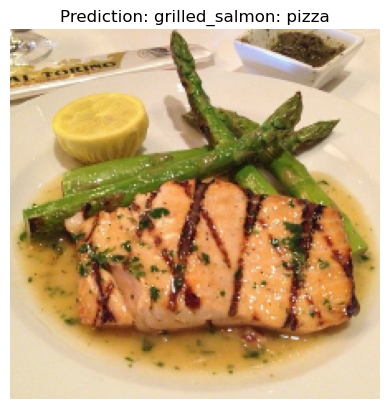

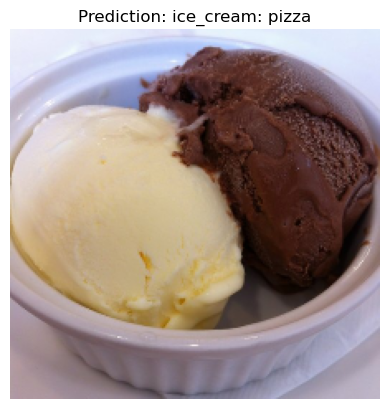

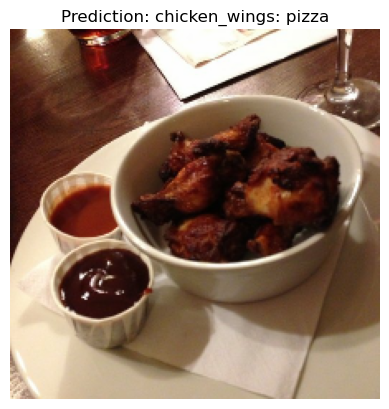

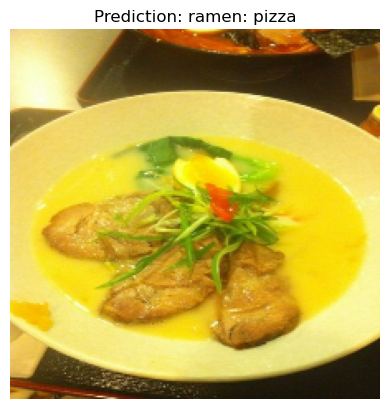

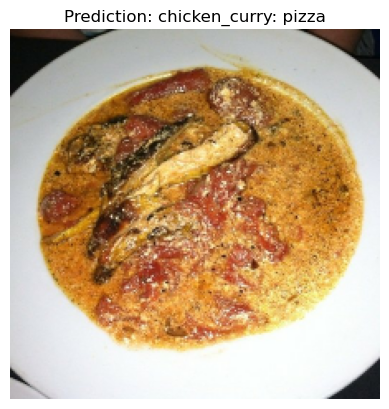

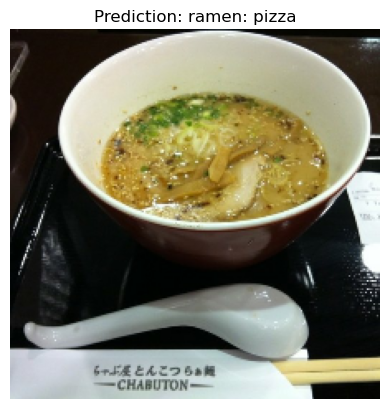

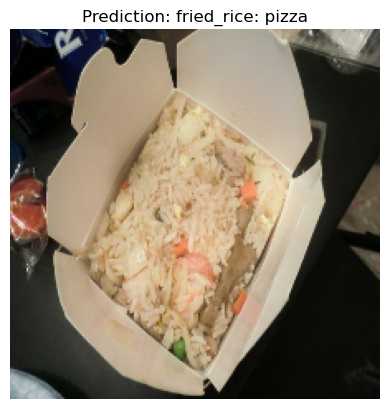

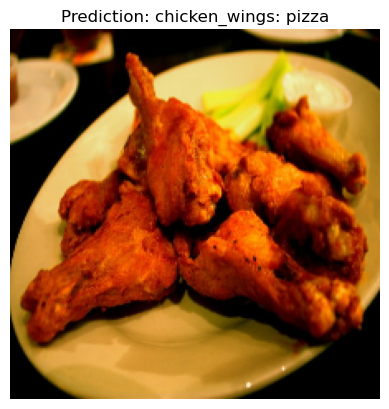

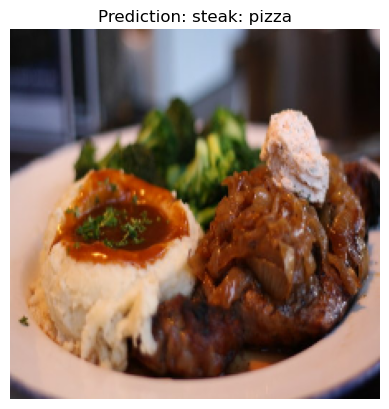

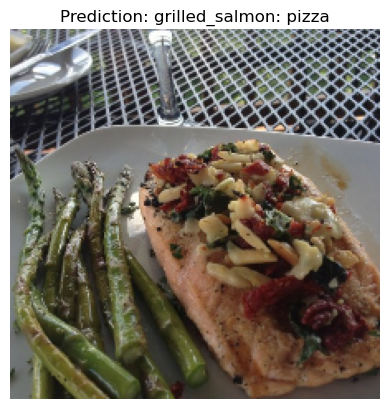

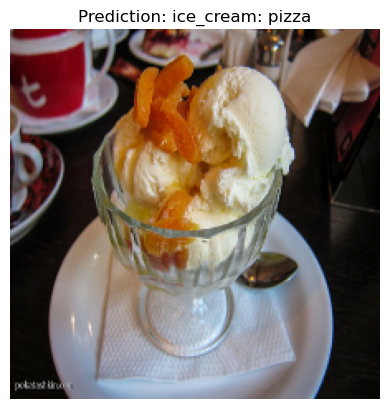

<Figure size 640x480 with 0 Axes>

In [81]:
import random

def view_random_image(target_dir, target_classes):
    print(target_classes)
    def get_pred():
        orignial_class = random.choice(target_classes)
        target_folder = target_dir + orignial_class
        random_choice = random.sample(os.listdir(target_folder), 1)


        img = tf.io.read_file(target_folder + "/" + random_choice[0])
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, [224, 224])
        img = img/255.

        pred = model_4.predict(tf.expand_dims(img, axis=0))
        pred_class = target_classes[pred.argmax()]
        return pred_class, orignial_class, img
    
    pred_class, orignial_class, img = get_pred()
    
    count = 0
    while True:
        if pred_class != orignial_class:
        
            plt.imshow(img)
            plt.title(f"Prediction: {orignial_class}: {pred_class}")
            plt.axis(False);
            plt.figure()
            count+=1
            if count>10:
                return
        pred_class, orignial_class, img = get_pred()
        

view_random_image(test_dir + "/",test_data.class_names)